In [100]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [101]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [105]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=5, criterion="entropy", random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [106]:
y_pred = classifier.predict(X_test)
#np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1)
#np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1)

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm 

array([[103,  27],
       [ 24,  38]], dtype=int64)

In [108]:
accuracy_score(y_test, y_pred)

0.734375

In [109]:
pd.crosstab(y_test, y_pred, rownames=["Actual Outcomes"], colnames=["Predicted Outcome"])

Predicted Outcome,0,1
Actual Outcomes,,
0,103,27
1,24,38


In [110]:
classifier.estimators_[0]
features = X.columns[:]
features
target = "Outcome"
target

'Outcome'

[Text(2200.39453125, 2114.0, 'Insulin <= 0.826\nentropy = 0.946\nsamples = 364\nvalue = [366, 210]\nclass = O'),
 Text(1324.8140625, 1993.2, 'Age <= -0.34\nentropy = 0.892\nsamples = 309\nvalue = [336, 150]\nclass = O'),
 Text(247.17656250000002, 1872.4, 'Age <= -0.924\nentropy = 0.632\nsamples = 167\nvalue = [217, 41]\nclass = O'),
 Text(121.6265625, 1751.6, 'SkinThickness <= 1.147\nentropy = 0.22\nsamples = 54\nvalue = [82, 3]\nclass = O'),
 Text(79.7765625, 1630.8000000000002, 'entropy = 0.0\nsamples = 51\nvalue = [80, 0]\nclass = O'),
 Text(163.4765625, 1630.8000000000002, 'Glucose <= -0.1\nentropy = 0.971\nsamples = 3\nvalue = [2, 3]\nclass = u'),
 Text(121.6265625, 1510.0, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = O'),
 Text(205.3265625, 1510.0, 'entropy = 0.0\nsamples = 1\nvalue = [0, 3]\nclass = u'),
 Text(372.7265625, 1751.6, 'BMI <= 2.193\nentropy = 0.76\nsamples = 113\nvalue = [135, 38]\nclass = O'),
 Text(330.87656250000003, 1630.8000000000002, 'SkinThickness <= 

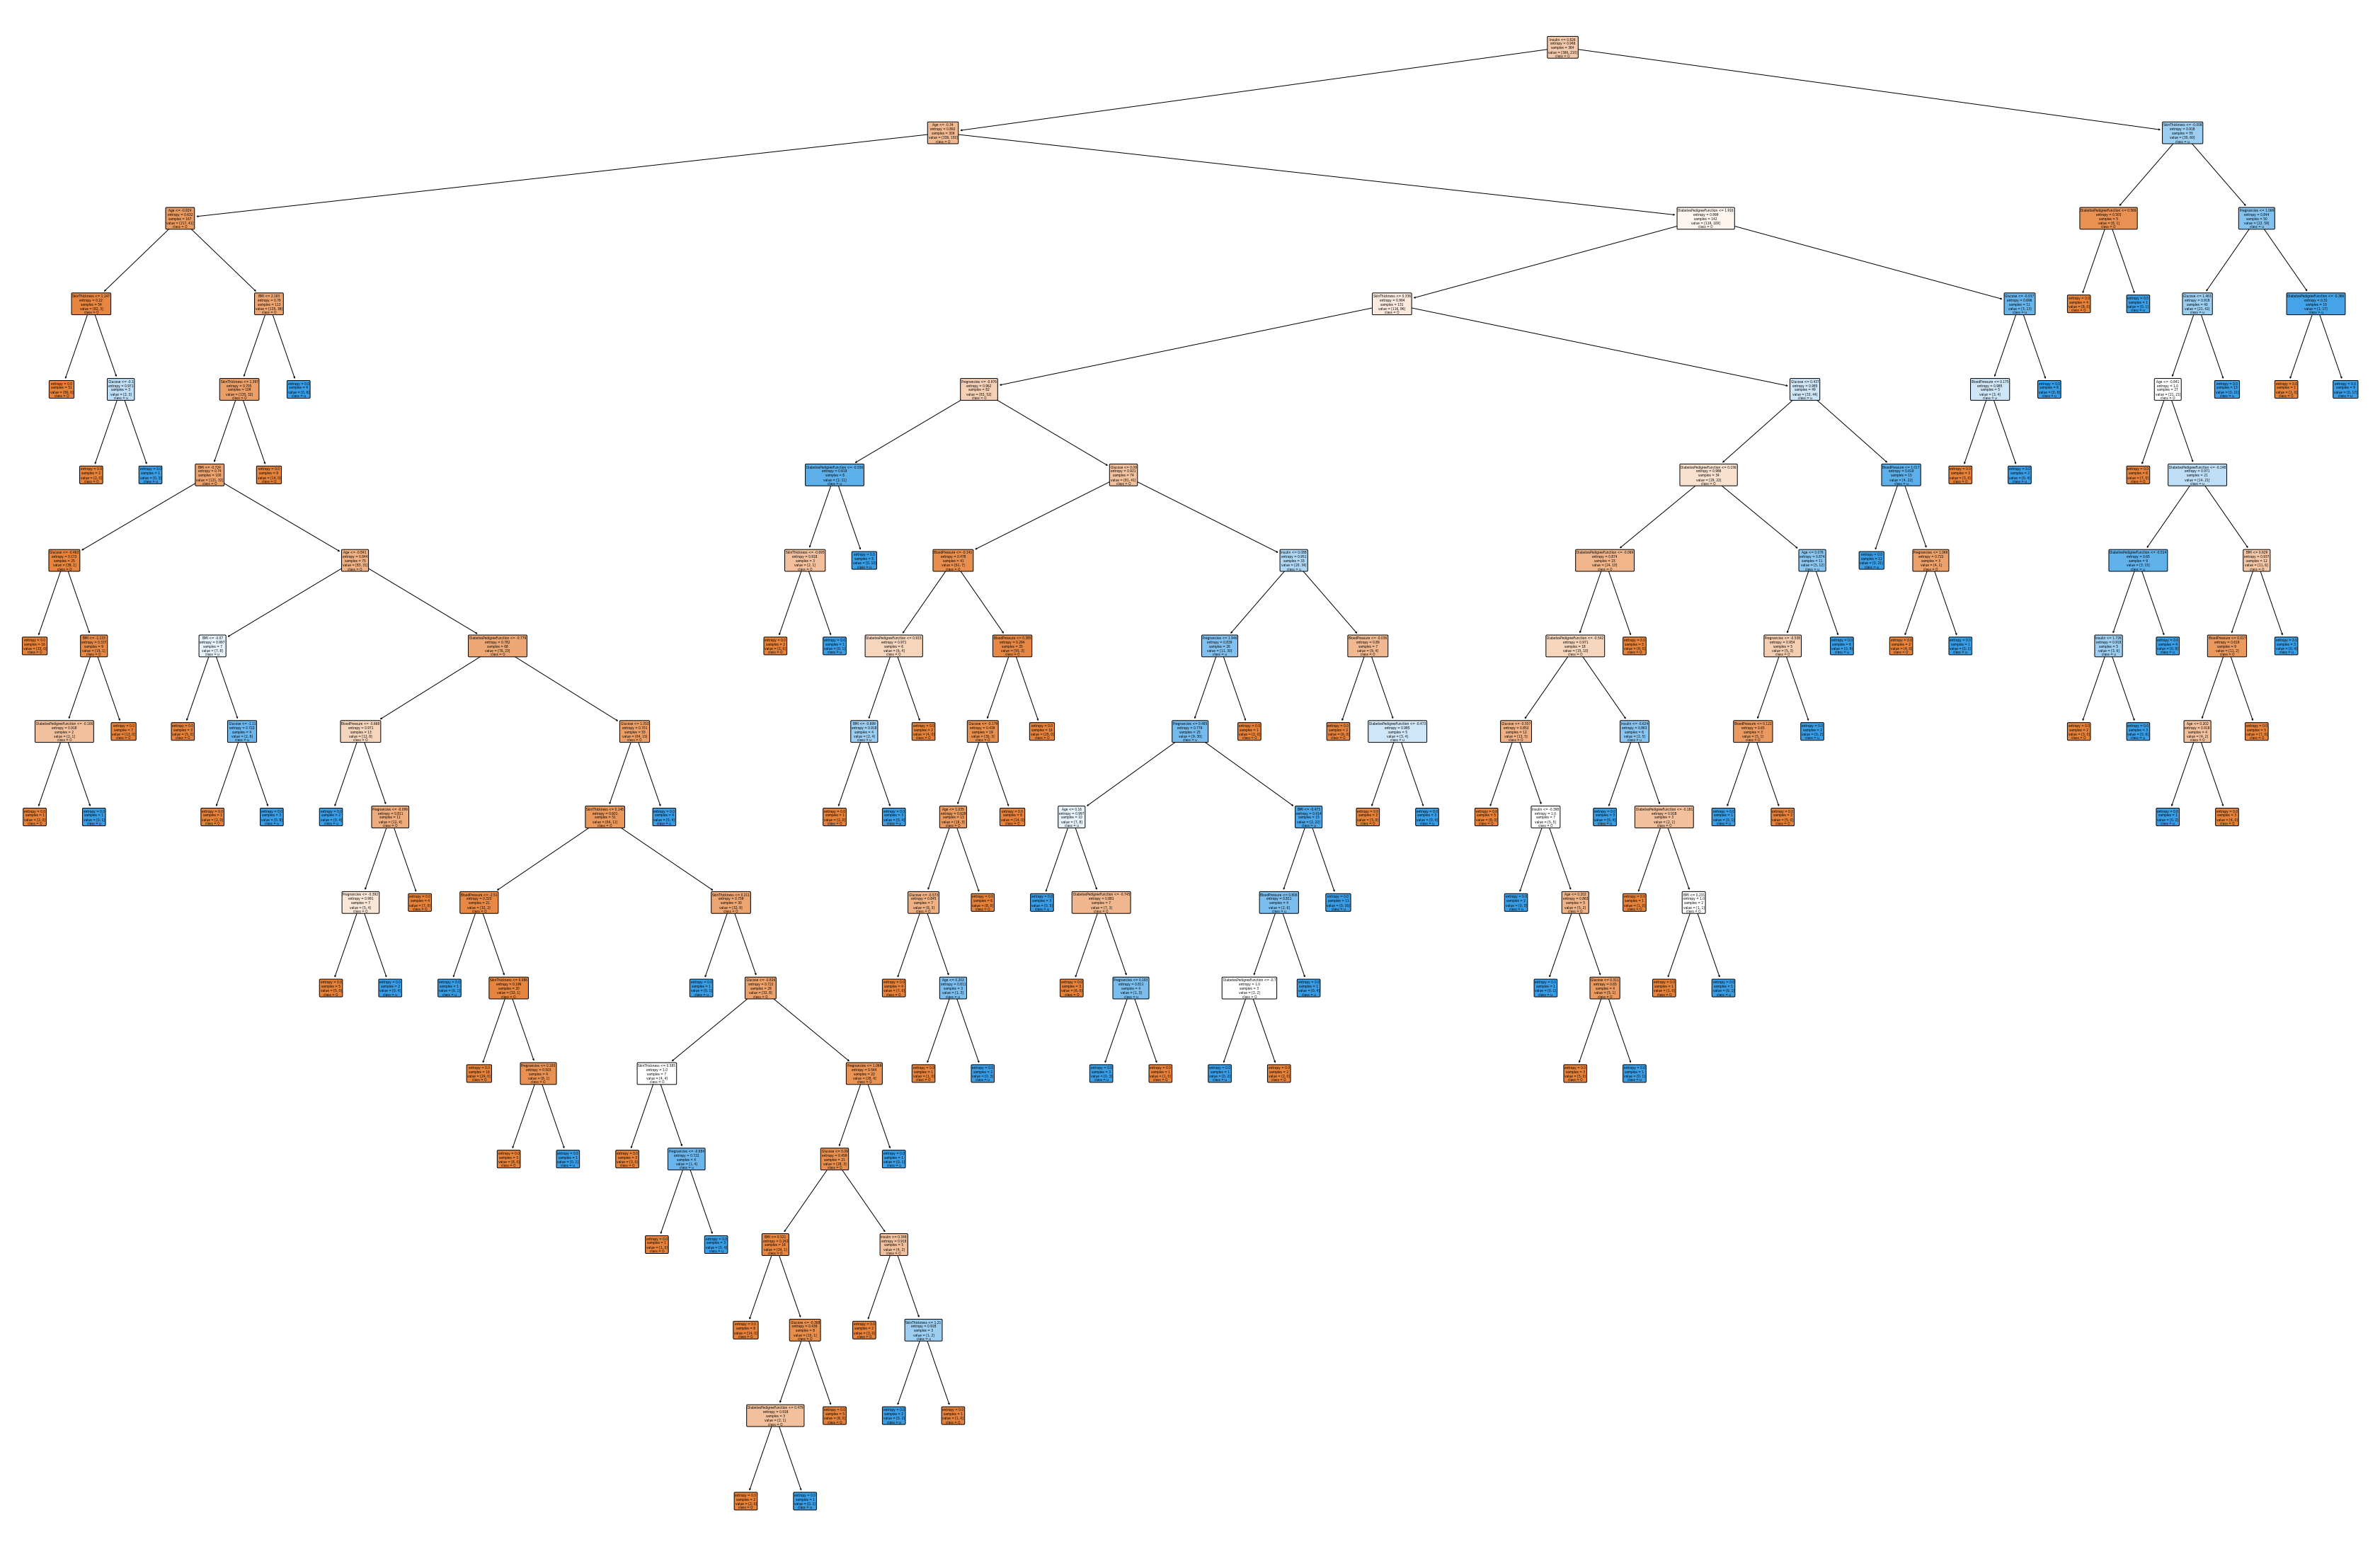

In [120]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(60, 40))
plot_tree(classifier.estimators_[0],
          feature_names=features,
          class_names=target, 
          filled=True, impurity=True, 
          rounded=True)

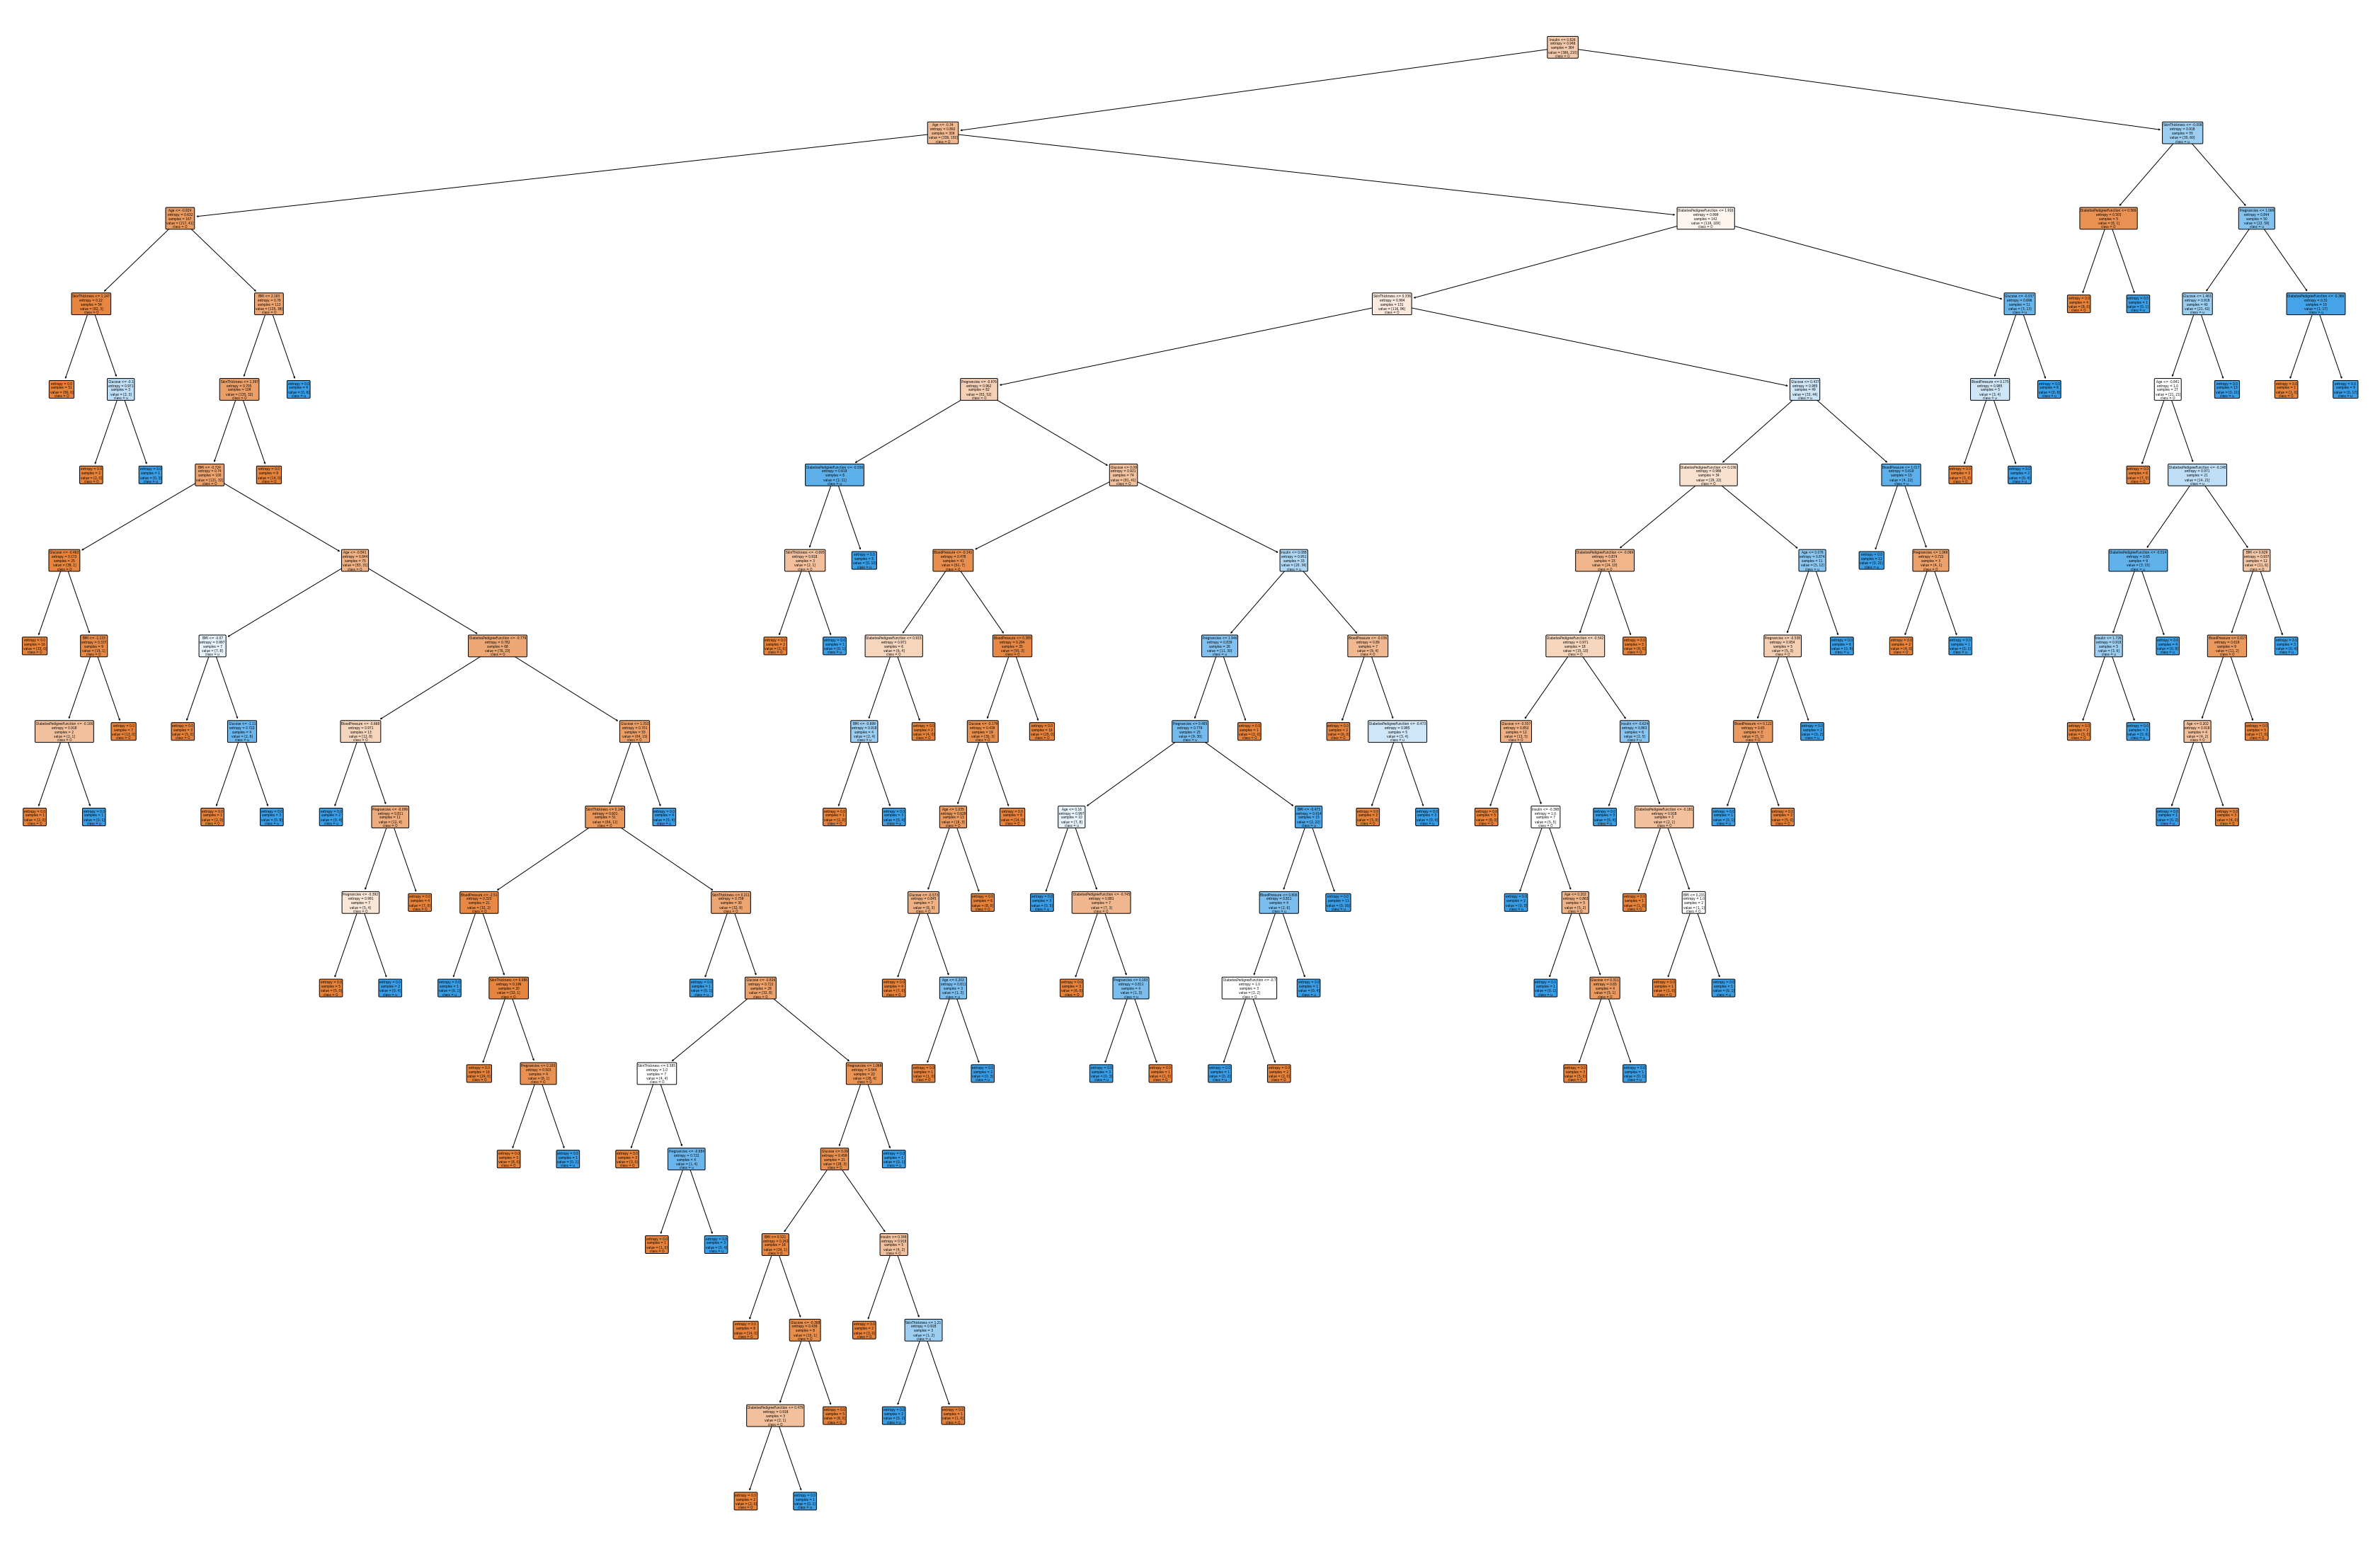

In [122]:
fig

In [112]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(classifier.estimators_[5], 
                           feature_names=features,
                           class_names=target, 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph

IndexError: list index out of range

In [ ]:
from dtreeviz.trees import dtreeviz

In [113]:
viz = dtreeviz(classifier.estimators_[0], X, y,
               target_name=target,
               feature_names=features,
               class_names=list(target),
               title="100th decision tree - Wine data")

viz.save("decision_tree_wine.svg")

from google.colab import files
files.download("decision_tree_wine.svg")

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH